# deskripsi library yang digunakan

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memanggil Dataset

In [129]:
df = pd.read_csv('wendys.csv')

## 1. BUSINESS UNDERSTANDING

Pada tahap ini membutuhkan pengetahuan dari objek bisnis, bagaimana membangun atau mendapatkan data, dan bagaimana untuk menentukan dan mencocokan tujuan pemodelan dengan jelas secara keseluruhan, menerjemahkan tujuan tersebut serta menentukan pembatasan dalam perumusan masalah data mining, dan selanjutnya mempersiapkan strategi awal untuk mencapai tujuan tersebut sehingga model terbaik dapat dibangun.

1. Problem 

Restoran Wendy's di America memiliki berbagai macam menu yang berbeda-beda dan tentunya akan memicu terjadinya kolesterol jika di konsumsi secara berlebihan. Sehingga apakah dengan mengkonsumsi menu makanan dari restoran Wendy's ini tanpa mengetahui dan menghitung jumlah asupan gizi seperti kalori, lemak, natrium, gula dan protein sesuai kebutuhan tubuh dapat mempengaruhi berat badan dan kesehatan organ tubuh. Maka dari itu, Restoran Wendy's melakukan penelitian dan riset dengan pakar kesehatan untuk mencantumkan komposisi dari makanan yang mereka buat agar pelanggan mengetahui asupan gizi seimbang yang akan dikonsumsi nya.

2. Tujuan

Dataset yang di ambil dari kaggle ini (https://www.kaggle.com/datasets/mattop/wendys-menu-nutrition-data) bertujuan untuk menganalisis dan mengetahui estimasi jumlah kolestrol dari menu Restoran Wendy's, agar pelanggan dapat lebih memahami kandungan nutrisi dan dapat membuat keputusan untuk asupan gizi makanan yang akan pelanggan beli, serta dapat membantu mengelola kesehatan dengan lebih baik.

2. DATA UNDERSTANDING

Tahap ini memberikan fondasi analitik untuk sebuah penelitian dengan membuat ringkasaan (summary) dan mengidentifikasi potensi masalah dalam data. Tahap ini juga harus dilakukan secara cermat dan tidak terburu-buru, seperti pada visualisasi data, yang terkadang insight-nya sangat sulit didapat dika dihubungkan dengan summary data nya. Jika ada masalah pada tahap ini yang belum terjawab, maka akan menggangu pada tahap modeling.

Dari pengumpulan data yang telah diambil mengenai Kandungan Gizi Menu Restoran Wendy's, terdapat 9 kolom yang berisi 2 kolom objek dan 7 kolom integer. Jika menggunakan regresi linear, maka hanya kolom yang berisi float saja yang bisa diolah. Berikut atribut-atribut nya :

0. Menu = objek
1. Category (golongan) = objek
2. Calories (Kalori) = int
3. Fat (Lemak) = int
4. Cholesterol (Kolestrol) = int
5. Sodium (Sodium) = int
6. Total_Carb (Total karbohidrat) = int
7. Sugars  (Gula) = int
8. Protein (Protein) = int

# Deskripsi Dataset

In [130]:
df.head(7)

,Menu,Category,Calories,Fat,Cholesterol,Sodium,Total_Carb,Sugars,Protein
0,Baconator,Burgers,950,62,205,1630,40,8,59
1,Dave’s Double,Burgers,810,51,175,1280,41,8,49
2,Dave’s Single,Burgers,570,34,100,1110,40,9,30
3,Dave’s Triple,Burgers,1090,72,260,1650,43,9,71
4,Double Stack,Burgers,390,21,90,740,26,6,25
5,Jr. Bacon Cheeseburger,Burgers,380,22,65,680,25,5,19
6,Jr. Cheeseburger,Burgers,280,13,50,660,26,6,16


# DATA PREPARATION

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Menu         43 non-null     object
 1   Category     43 non-null     object
 2   Calories     43 non-null     int64 
 3   Fat          43 non-null     int64 
 4   Cholesterol  43 non-null     int64 
 5   Sodium       43 non-null     int64 
 6   Total_Carb   43 non-null     int64 
 7   Sugars       43 non-null     int64 
 8   Protein      43 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 3.1+ KB


<AxesSubplot:>

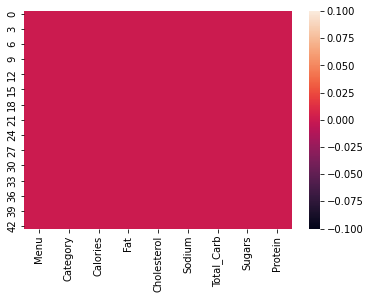

In [132]:
sns.heatmap(df.isnull())

In [133]:
df.describe()

,Calories,Fat,Cholesterol,Sodium,Total_Carb,Sugars,Protein
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,483.953488,27.186047,121.860465,1087.441860,36.720930,4.534884,23.906977
std,208.876126,14.978168,99.773692,425.916899,13.393896,2.906060,14.667447
min,120.000000,8.000000,0.000000,170.000000,4.000000,0.000000,1.000000
25%,350.000000,16.500000,50.000000,750.000000,27.000000,2.000000,15.500000
50%,450.000000,23.000000,90.000000,1030.000000,36.000000,5.000000,20.000000
75%,600.000000,33.500000,207.500000,1370.000000,45.000000,6.500000,31.000000
max,1090.000000,72.000000,420.000000,2020.000000,70.000000,10.000000,71.000000


# Visualisasi Data

<AxesSubplot:>

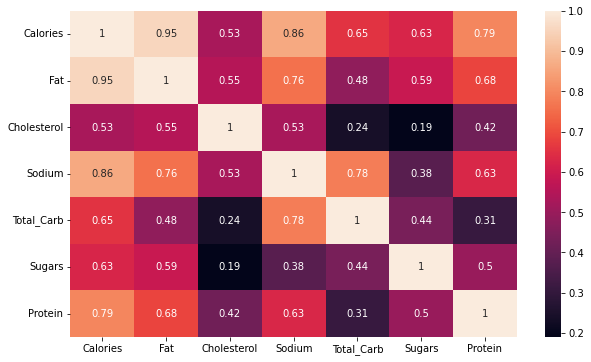

In [134]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# Jumlah Kolesterol berdasarkan Menu

In [135]:
models = df.groupby('Menu').count()[['Calories']].sort_values(by='Calories',ascending=True).reset_index()
models = models.rename(columns={'Calories':'Cholesterol'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 [Text(0, 0, '10 Piece Chicken Nuggets'),
  Text(1, 0, 'Homestyle Asiago Ranch Chicken Club'),
  Text(2, 0, 'Homestyle Chicken Sandwich'),
  Text(3, 0, 'Honey Butter Chicken Biscuit'),
  Text(4, 0, 'Jr. Bacon Cheeseburger'),
  Text(5, 0, 'Jr. Cheeseburger'),
  Text(6, 0, 'Jr. Cheeseburger Deluxe'),
  Text(7, 0, 'Sausage Biscuit'),
  Text(8, 0, 'Sausage Breakfast Bowl'),
  Text(9, 0, 'Grilled Chicken Wrap'),
  Text(10, 0, 'Sausage and Egg Burrito'),
  Text(11, 0, 'Seasoned Home-Style Potatoes, Large'),
  Text(12, 0, 'Seasoned Home-Style Potatoes, Medium'),
  Text(13, 0, 'Seasoned Home-Style Potatoes, Small'),
  Text(14, 0, 'Son of Baconator'),
  Text(15, 0, 'Spicy Asiago Ranch Club'),
  Text(16, 0, 'Spicy Chicken Sandwich'),
  Text(17, 0, 'Spicy Chicken Wrap'),
  Text(18, 0, 'S’Awesome Sauce'

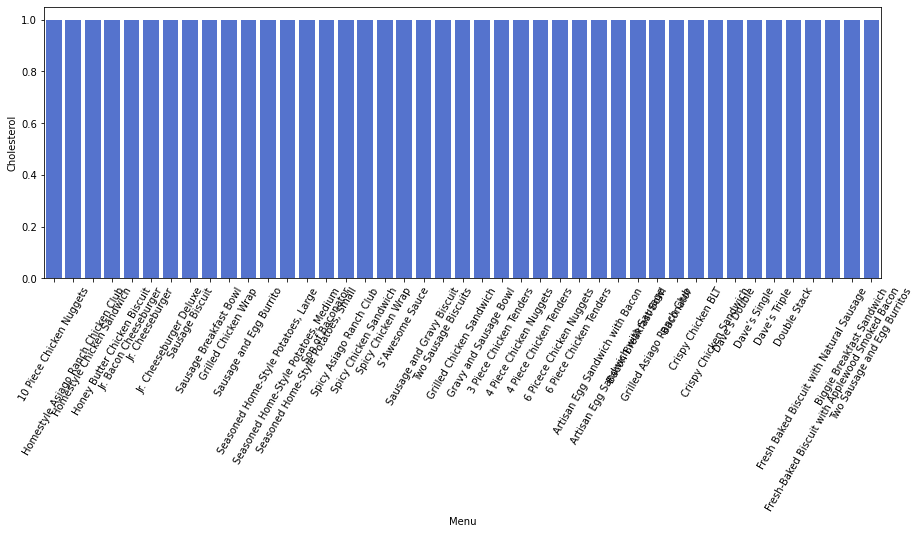

In [136]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['Menu'], y=models['Cholesterol'], color='royalblue')
plt.xticks(rotation=60)

# MODELLING DATA

# seleksi fitur

In [137]:
features = ['Fat','Sodium','Total_Carb','Sugars','Protein','Calories']
x = df[features]
y = df['Cholesterol']
x.shape, y.shape

((43, 6), (43,))

# split data training dan data testing

In [138]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(11,)

# membuat model regresi linier

In [139]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

# EVALUATION DATA

In [141]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.2821853837790379


# membuat inputan model regresi linier

In [144]:
#Fat=72, Sodium=1650 , Total_Carb=43, Sugars=9 , Protein=71 , Calories=1090
input_data = np.array([[72, 1650, 43, 9, 71, 1090]])

prediction = lr.predict(input_data)
print('Estimasi Jumlah Kolesterol Menu Wendys :', prediction)

Estimasi Jumlah Kolesterol Menu Wendys : [260.7273768]


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


# DEPLOYMENT

# save model

In [145]:
import pickle

filename = 'estimasi_wendys.sav'
pickle.dump(lr,open(filename,'wb'))